# 6 apr (Support Vector Machines1)

Answer 1
The mathematical formula for a linear SVM (Support Vector Machine) is:

Given a set of training data {(x1, y1), (x2, y2), ..., (xn, yn)}, where xi represents the feature vector for the i-th sample, and yi is its corresponding class label (either -1 or 1), the objective of a linear SVM is to find a hyperplane that separates the positive and negative samples with the largest margin.

The hyperplane can be represented as:

w^T x + b = 0

where w is a weight vector perpendicular to the hyperplane, and b is a scalar representing the offset of the hyperplane from the origin.

To find the optimal hyperplane, we can solve the following optimization problem:

minimize 1/2 ||w||^2

subject to yi(w^T xi + b) >= 1 for all i

Answer 2
The objective function of a linear SVM is to maximize the margin between the positive and negative samples. This can be expressed as minimizing the norm of the weight vector w, subject to the constraint that all samples are classified correctly:

minimize 1/2 ||w||^2

subject to yi(w^T xi + b) >= 1 for all i

The margin is defined as the distance between the hyperplane and the closest sample point from either class. By maximizing the margin, we can obtain a robust and generalizable classifier that is less prone to overfitting.

Answer 3
The kernel trick is a technique used in SVM to allow for nonlinear classification boundaries. It involves mapping the original feature space to a higher-dimensional space where it may be easier to separate the classes with a linear boundary. This is done by defining a kernel function K(xi, xj) that computes the dot product of the two transformed feature vectors:

K(xi, xj) = φ(xi) · φ(xj)

where φ(.) is a nonlinear transformation function.

The most commonly used kernel functions include the linear kernel, polynomial kernel, Gaussian RBF kernel, and sigmoid kernel. By using a kernel function, we can implicitly map the input features to a higher-dimensional space without actually computing the transformed feature vectors, which can be computationally expensive or even impossible in some cases.

Answer 4
The role of support vectors in SVM is to define the decision boundary or hyperplane. These are the data points that are closest to the hyperplane and are crucial for defining the margin. In other words, they are the points that "support" the hyperplane.

During the training of an SVM, the algorithm selects a subset of the training data as support vectors. These support vectors are the ones that lie closest to the decision boundary and have a non-zero coefficient in the solution for the optimization problem. All other training examples that are not support vectors do not affect the solution of the optimization problem and can be ignored.

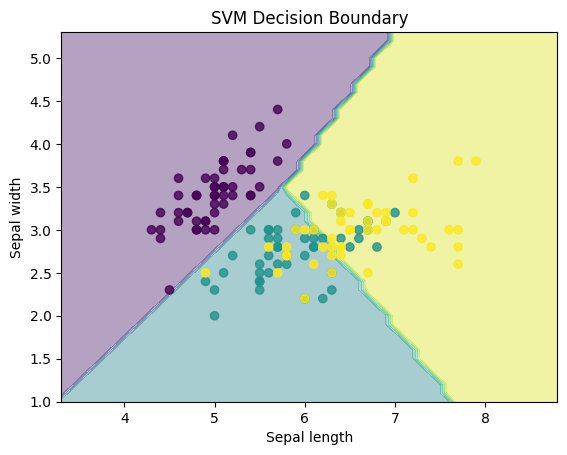

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# load the iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features for visualization purposes
y = iris.target

# split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# create an SVM classifier object
svm = SVC(kernel='linear', C=1, random_state=42)

# train the classifier on the training set
svm.fit(X_train, y_train)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# plot the decision boundary
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('SVM Decision Boundary')
plt.show()

Answer 5
Here are the definitions and examples of Hyperplane, Marginal plane, Soft margin, and Hard margin in SVM:

Hyperplane: A hyperplane is a decision boundary that separates the data points of different classes. In a linear SVM, the hyperplane is a linear function that takes the form of w^T x + b = 0, where w is a weight vector perpendicular to the hyperplane, x is the feature vector, and b is a scalar representing the offset of the hyperplane from the origin.

Marginal plane: The marginal plane is the hyperplane that runs parallel to the decision boundary and is equidistant from the support vectors. It is used to define the margin, which is the distance between the decision boundary and the closest support vector.

Hard margin: In a hard margin SVM, the decision boundary is chosen to maximize the margin between the classes, subject to the constraint that all training examples are correctly classified. If the classes are not linearly separable, this optimization problem will not have a feasible solution.

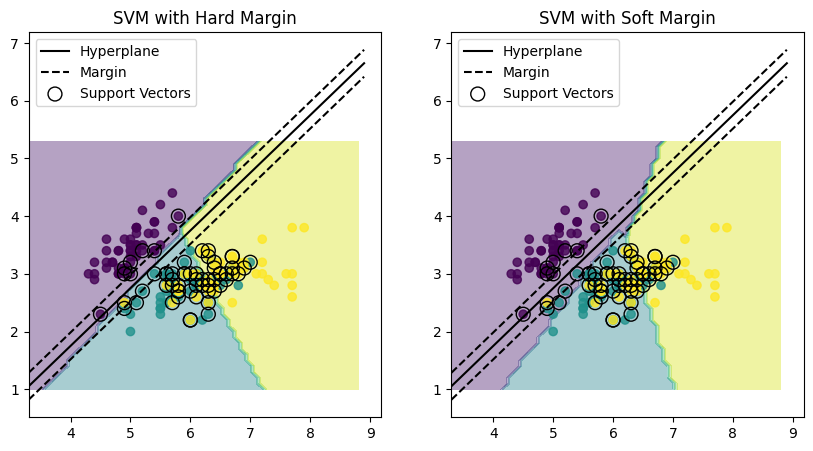

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

# load the iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features for visualization purposes
y = iris.target

# create an SVM classifier object with a linear kernel and different margin parameters
svm_hard = SVC(kernel='linear', C=1000)
svm_soft = SVC(kernel='linear', C=0.01)

# train the classifier on the entire dataset
svm_hard.fit(X, y)
svm_soft.fit(X, y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# plot the decision boundaries and margins
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

Z_hard = svm_hard.predict(np.c_[xx.ravel(), yy.ravel()])
Z_hard = Z_hard.reshape(xx.shape)
ax1.contourf(xx, yy, Z_hard, alpha=0.4)
ax1.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
ax1.set_title('SVM with Hard Margin')

Z_soft = svm_soft.predict(np.c_[xx.ravel(), yy.ravel()])
Z_soft = Z_soft.reshape(xx.shape)
ax2.contourf(xx, yy, Z_soft, alpha=0.4)
ax2.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
ax2.set_title('SVM with Soft Margin')

for ax in (ax1, ax2):
    # plot the hyperplane
    w = svm.coef_[0]
    a = -w[0] / w[1]
    xx_hyperplane = np.linspace(x_min, x_max)
    yy_hyperplane = a * xx_hyperplane - (svm.intercept_[0]) / w[1]
    ax.plot(xx_hyperplane, yy_hyperplane, 'k-', label='Hyperplane')
    
    # plot the margins
    margin = 1 / np.sqrt(np.sum(svm.coef_ ** 2))
    yy_margin1 = yy_hyperplane + a * margin
    yy_margin2 = yy_hyperplane - a * margin
    ax.plot(xx_hyperplane, yy_margin1, 'k--', label='Margin')
    ax.plot(xx_hyperplane, yy_margin2, 'k--')
    
    # plot the support vectors
    ax.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k', label='Support Vectors')
    
    ax.legend()

plt.show()

In [3]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
# load iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
# split the dataset into a training set and a testing set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# train a linear SVM classifier on the training set:
svm = SVC(kernel='linear', C=1)
svm.fit(X_train, y_train)
SVC(C=1, kernel='linear')
# Predict the labels for the testing set:
y_pred = svm.predict(X_test)
# Compute the accuracy of the model on the testing set:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


To plot the decision boundaries of the trained model using two of the features, you can create a meshgrid and use the predict() method of the SVM to make predictions on the meshgrid:


In [ ]:
# Create a meshgrid of feature values
x_min, x_max = X[:, 2].min() - 1, X[:, 2].max() + 1
y_min, y_max = X[:, 3].min() - 1, X[:, 3].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Make predictions on the meshgrid
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])

# Reshape the predictions and plot the decision boundaries
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 2], X[:, 3], c=y, cmap=plt.cm.Paired)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.show()

To try different values of the regularisation parameter C and see how it affects the performance of the model, you can create a loop that trains and tests the SVM with different values of C

In [5]:
for c in [0.1, 1, 10, 100]:
    svm = SVC(kernel='linear', C=c)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"C={c}, accuracy={accuracy}")

C=0.1, accuracy=1.0
C=1, accuracy=1.0
C=10, accuracy=0.9777777777777777
C=100, accuracy=1.0
